# Argo Canada BGC Quality Control

In [1]:
# import package
import bgcArgoDMQC as bgc


### Oxygen DMQC

For delayed mode quality control, we need to (1) visually inspect the data as a DMQC operator and (2) compute a gain by comparing the data to a reference source, typically WOA, NCEP, or ERA5 data. For both of these tasks, we will load the data via the [synthetic profile file](https://archimer.ifremer.fr/doc/00445/55637/). `bgcArgoDMQC` can load these files given a WMO number, and has functions for visualizing and performing QC on the data within.

c:\Users\GordonC\Documents\projects\bgcArgoDMQC\bgcArgoDMQC\unit.py:36: RuntimeWarning: invalid value encountered in log
  Ts = np.log((298.15 - T)/(273.15 + T))


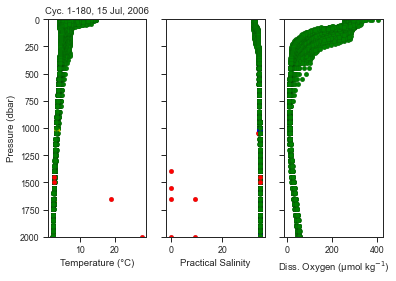

In [3]:
# define a WMO number you want to look at
wmo = 4900869
# load into a synthetic profile object
syn = bgc.sprof(wmo)
# look at the current state of QC flags for T, S, and DO
g1 = syn.plot(kind='qcprofiles', varlist=['TEMP', 'PSAL', 'DOXY'])

We can see above that most T/S points are good, with a few obvious outliers in red. THe oxygen data also look all good. This is an old float, but for current floats the QC flag for unadjusted oxygen should be 3 (probably bad). If we want to see just good data (QC flags of 1, 2, 5, 8) so that the scale on the salinity plot isn't so bad, we can run:

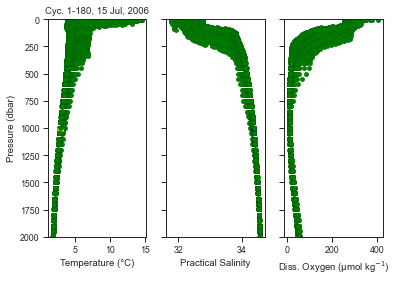

In [4]:
# get rid of bad flags
syn.clean()
# re-make above plot
g2 = syn.plot(kind='qcprofiles', varlist=['TEMP', 'PSAL', 'DOXY'])

As a QC operator it would be out job to set the flags for `DOXY` to 3 in the D-mode file. Since none of the "good" points look wrong (note - its hard to tell in a big cloud of points like this, I usually look at profiles indiviually but that would be overkill in this notebook), our visual inspection is done and we can calulate the gain. Since this is an older float, there are no in-air measurements made by the optode. Therefore we will calcualte the gain by comparing surface values to WOA data.

In [5]:
# calculate the gains
gains = syn.calc_gains(ref='WOA')

Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological pro

c:\Users\GordonC\Documents\projects\bgcArgoDMQC\bgcArgoDMQC\interp\interp.py:207: RuntimeWarning: Mean of empty slice
  woa_interp[:,i] = np.nanmean(np.nanmean(D3, axis=2), axis=1)
c:\Users\GordonC\Documents\projects\bgcArgoDMQC\bgcArgoDMQC\core\core.py:1005: RuntimeWarning: Mean of empty slice
  mean_float_data[i,2] = np.nanmean(subset_o2sat)
c:\ProgramData\Anaconda3\envs\py39\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


The `ref` keyword argument sets the reference dataset. In this case we set it to WOA data. By default `ref` is set to `'NCEP'`, but in this case that would return all `NaN` values since there is no in-air data for this float.

We can also visualize the gains in a single line:

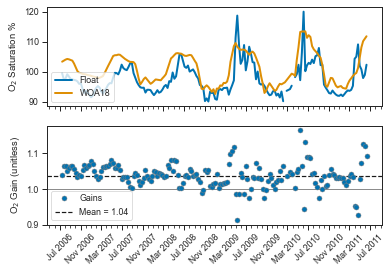

In [6]:
# plot gains over time, show source data
g3 = syn.plot('gain', ref='WOA')

I find this plot particularly useful, as sometimes it is a good indicator to go back and inspect certain profiles. We see a couple large spikes in the suface float data. Are those spikes real, or should we go back and have a closer look at those profiles? This could change our mean gain a little, and perhaps we would flag some data as bad that we didn't notice before.